In [ ]:
# notes:
# conda stopped automatically setting environments up as jupyter kernels. You need to manually add kernels for each environment
# ------------------ code in terminal --------------------:
#source activate myenv
#python -m ipykernel install --user --name myenv --display-name "Python (myenv)"

In [ ]:
#conda install -c conda-forge cartopy

In [ ]:
#conda install geopandas

In [ ]:
#conda install pyproj

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas
import csv
import os
import pandas as pd
import json
import numpy as np
import pandas as pd
import re
import warnings
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from pyproj import CRS

In [ ]:
#fig = plt.figure()
#ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
#ax.coastlines()
#plt.show()

In [2]:
mydata = pd.read_csv('mydata.csv',dtype="a", encoding='utf-8')

In [3]:
# remove geo NAN cells
print(len(mydata.index))
nan_value = float("NaN")
mydata.replace("", nan_value, inplace=True)
mydata.dropna(subset = ["geo.geo.bbox"], inplace=True)
print(len(mydata.index))

428078
417255


In [4]:
mydata['geo.geo.bbox'] = mydata['geo.geo.bbox'].astype(str)
mydata['geo.geo.bbox'] =  mydata['geo.geo.bbox'].apply(lambda x: x.replace('[','').replace(']','')) 

In [5]:
# split 'geo.geo.bbox' , keep only one pair of lon & lat
mydata[['lon','lat','lon1','lat2']] = mydata['geo.geo.bbox'].str.split(',',expand=True)

In [6]:
mydata.lat.dtype

dtype('O')

In [ ]:
# errors occur : this raw dataset has one line lack of "created info", 
# causing data Indent Forward, lon&lat contents wrong
# check position of a given cell value, find error in lat:"' CA'" - row 103355 - delete

In [ ]:
"""
def getIndexes(dfObj, value):
      
    # Empty list
    listOfPos = []
      
    # isin() method will return a dataframe with boolean values, True at the positions where element exists
    result = dfObj.isin([value])
      
    # any() method will return 
    # a boolean series
    seriesObj = result.any()
  
    # Get list of column names where element exists
    columnNames = list(seriesObj[seriesObj == True].index)
     
    # Iterate over the list of columns and extract the row index where element exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
  
        for row in rows:
            listOfPos.append((row, col))
              
    # This list contains a list tuples with the index of element in the dataframe
    return listOfPos
  
# Calling getIndexes() function to get the index positions of all occurrences of "value" in the dataframe
listOfPositions = getIndexes(mydata, ' CA')
print('Index positions of " CA" in Dataframe : ')
  
# Printing the position
for i in range(len(listOfPositions)):
    print( listOfPositions[i])
    
"""

In [ ]:
# check dataset
# mydata.loc[[410755]]

In [ ]:
#i = mydata[((mydata.lat == ' CA') &( mydata.lon == 'San Francisco'))].index 
#mydata=mydata.drop(i)
#print(len(mydata.index))

In [ ]:
mydata[['geo.full_name']].head(10)

In [7]:
mydata['lon'] = mydata['lon'].astype(float)

In [8]:
mydata['lat'] = mydata['lat'].astype(float, errors = 'raise')

In [9]:
geometry = [Point(xy) for xy in zip(mydata['lon'], mydata['lat'])]

In [10]:
df1 = mydata.iloc[:23109,:]
df2 = mydata.iloc[23109:34953,:]
df3 = mydata.iloc[34953:49136,:]
df4 = mydata.iloc[49136:59880,:]
df5 = mydata.iloc[59880:86704,:]
df6 = mydata.iloc[86704:101974,:]
df7 = mydata.iloc[101974:118201,:]
df8 = mydata.iloc[118201:167648,:]
df9 = mydata.iloc[167648:185461,:]
df10 = mydata.iloc[185461:194728,:]
df11 = mydata.iloc[194728:234272,:]
df12 = mydata.iloc[234272:247020,:]
df13 = mydata.iloc[247020:261805,:]
df14 = mydata.iloc[261805:282176,:]
df15 = mydata.iloc[282176:296948,:]
df16 = mydata.iloc[296948:313534,:]
df17 = mydata.iloc[313534:323817,:]
df18 = mydata.iloc[323817:381165,:]
df19 = mydata.iloc[381165:404897,:]
df20 = mydata.iloc[404897:,:]

In [ ]:
'''
frames = [dt1,dt2,dt3,dt4,dt5,dt6,dt7,dt8,dt9,dt10,dt11,dt12,dt13,dt14,dt15,dt16,dt17,dt18,dt19,dt20]
testdata = pd.concat(frames)
print(len(testdata.index))
'''

<Figure size 8640x7200 with 0 Axes>

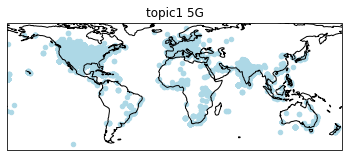

In [11]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
ax.coastlines()

df1.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="YlOrRd", 
        title=f"topic1 5G", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

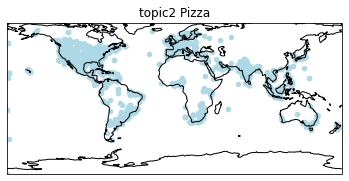

In [12]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
ax.coastlines()

df2.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="YlOrRd", 
        title=f"topic2 Pizza", 
        ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

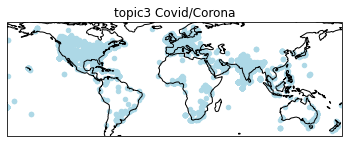

In [13]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
ax.coastlines()

df3.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="YlOrRd", 
        title=f"topic3 Covid/Corona", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

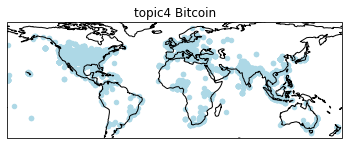

In [14]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
ax.coastlines()

df4.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="YlOrRd", 
        title=f"topic4 Bitcoin", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

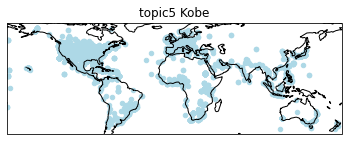

In [15]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
ax.coastlines()

df5.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="YlOrRd", 
        title=f"topic5 Kobe", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

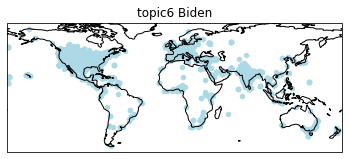

In [16]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
ax.coastlines()

df6.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic6 Biden", 
        ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

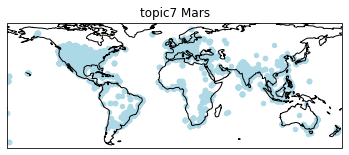

In [17]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
ax.coastlines()

df7.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic7 Mars", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

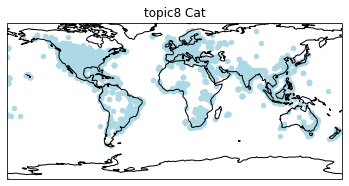

In [18]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
ax.coastlines()

df8.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic8 Cat", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

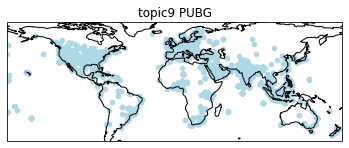

In [19]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
ax.coastlines()

df9.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic9 PUBG", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

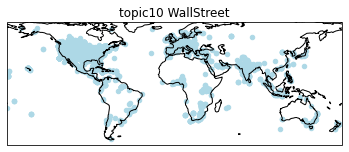

In [21]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# 调用ax的方法画海岸线
ax.coastlines()
#ax.stock_img()
#ax.gridlines()

df10.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic10 WallStreet", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

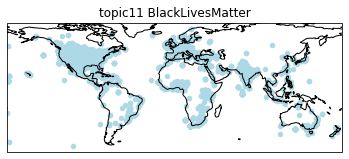

In [22]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# 调用ax的方法画海岸线
ax.coastlines()
#ax.stock_img()
#ax.gridlines()

df11.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic11 BlackLivesMatter", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

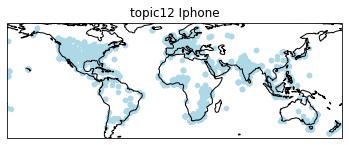

In [23]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# 调用ax的方法画海岸线
ax.coastlines()
#ax.stock_img()
#ax.gridlines()

df12.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic12 Iphone", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

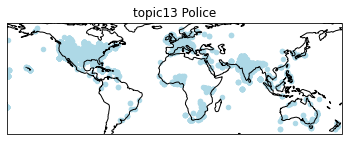

In [24]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# 调用ax的方法画海岸线
ax.coastlines()
#ax.stock_img()
#ax.gridlines()

df13.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic13 Police", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

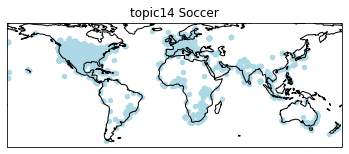

In [25]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# 调用ax的方法画海岸线
ax.coastlines()
#ax.stock_img()
#ax.gridlines()

df14.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic14 Soccer", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

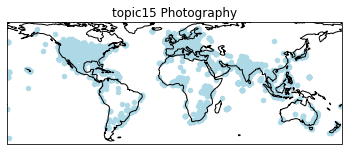

In [26]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# 调用ax的方法画海岸线
ax.coastlines()
#ax.stock_img()
#ax.gridlines()

df15.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic15 Photography", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

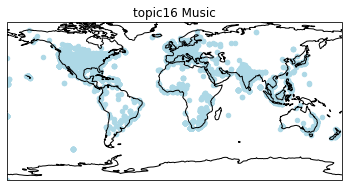

In [27]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# 调用ax的方法画海岸线
ax.coastlines()
#ax.stock_img()
#ax.gridlines()

df16.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic16 Music", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

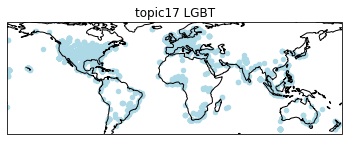

In [28]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# 调用ax的方法画海岸线
ax.coastlines()
#ax.stock_img()
#ax.gridlines()

df17.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic17 LGBT", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

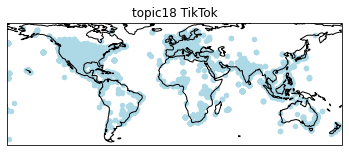

In [29]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# 调用ax的方法画海岸线
ax.coastlines()
#ax.stock_img()
#ax.gridlines()

df18.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic18 TikTok", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

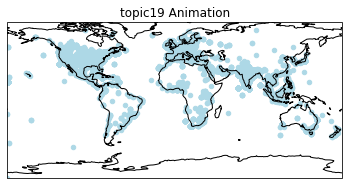

In [30]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# 调用ax的方法画海岸线
ax.coastlines()
#ax.stock_img()
#ax.gridlines()

df19.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic19 Animation", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

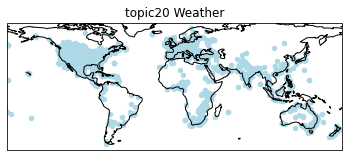

In [31]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# 调用ax的方法画海岸线
ax.coastlines()
#ax.stock_img()
#ax.gridlines()

df20.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic20 Weather", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

In [ ]:
# --------------------------     USA plot     -----------------------  #

In [32]:
#df1[['geo.full_name']].head(10)
df1.head(2)

,created_at,lang,text,id,author_id,geo.place_id,geo.name,geo.country_code,geo.country,geo.id,...,author.public_metrics.listed_count,author.id,author.name,author.location,geo.coordinates.type,geo.coordinates.coordinates,lon,lat,lon1,lat2
0,2021-04-29T23:39:55.000Z,en,Customers are loving this 5G for All Trade in ...,1387914576784592896,992609029326176257,0fc3474d6915b000,T-Mobile,US,Etats-Unis,0fc3474d6915b000,...,0,992609029326176257,Martin Moore,NaN,NaN,NaN,-117.987669,33.700940,-117.98766875335787,33.70094049431383
1,2021-04-29T23:33:03.000Z,en,These 5G speeds are crazy! @TMobile #WeWontSto...,1387912847909220352,66944716,3b77caf94bfc81fe,Los Angeles,US,Etats-Unis,3b77caf94bfc81fe,...,2,66944716,Berny Palomo,"Los Angeles, CA",NaN,NaN,-118.668404,33.704538,-118.155409,34.337041


In [33]:
USdata1 = df1.loc[df1['geo.country_code'] == 'US']
index =USdata1.index
number_of_rows = len(index)
#find length of index
print(number_of_rows)

16542


In [34]:
USdata2 = df2.loc[df2['geo.country_code'] == 'US']
USdata3 = df3.loc[df3['geo.country_code'] == 'US']
USdata4 = df4.loc[df4['geo.country_code'] == 'US']
USdata5 = df5.loc[df5['geo.country_code'] == 'US']
USdata6 = df6.loc[df6['geo.country_code'] == 'US']
USdata7 = df7.loc[df7['geo.country_code'] == 'US']
USdata8 = df8.loc[df8['geo.country_code'] == 'US']
USdata9 = df9.loc[df9['geo.country_code'] == 'US']
USdata10 = df10.loc[df10['geo.country_code'] == 'US']
USdata11 = df11.loc[df11['geo.country_code'] == 'US']
USdata12 = df12.loc[df12['geo.country_code'] == 'US']
USdata13 = df13.loc[df13['geo.country_code'] == 'US']
USdata14 = df14.loc[df14['geo.country_code'] == 'US']
USdata15 = df15.loc[df15['geo.country_code'] == 'US']
USdata16 = df16.loc[df16['geo.country_code'] == 'US']
USdata17 = df17.loc[df17['geo.country_code'] == 'US']
USdata18 = df18.loc[df18['geo.country_code'] == 'US']
USdata19 = df19.loc[df19['geo.country_code'] == 'US']
USdata20 = df20.loc[df20['geo.country_code'] == 'US']

In [35]:
USdata1.head(3)

,created_at,lang,text,id,author_id,geo.place_id,geo.name,geo.country_code,geo.country,geo.id,...,author.public_metrics.listed_count,author.id,author.name,author.location,geo.coordinates.type,geo.coordinates.coordinates,lon,lat,lon1,lat2
0,2021-04-29T23:39:55.000Z,en,Customers are loving this 5G for All Trade in ...,1387914576784592896,992609029326176257,0fc3474d6915b000,T-Mobile,US,Etats-Unis,0fc3474d6915b000,...,0,992609029326176257,Martin Moore,NaN,NaN,NaN,-117.987669,33.700940,-117.98766875335787,33.70094049431383
1,2021-04-29T23:33:03.000Z,en,These 5G speeds are crazy! @TMobile #WeWontSto...,1387912847909220352,66944716,3b77caf94bfc81fe,Los Angeles,US,Etats-Unis,3b77caf94bfc81fe,...,2,66944716,Berny Palomo,"Los Angeles, CA",NaN,NaN,-118.668404,33.704538,-118.155409,34.337041
2,2021-04-29T23:02:52.000Z,en,This reads very strangely because it’s an inco...,1387905252066832384,18609072,91eb113282d003a1,Lansing,US,Etats-Unis,91eb113282d003a1,...,143,18609072,Joshua Pugh,No more than 6 miles from a body of water,NaN,NaN,-84.631840,42.618566,-84.483958,42.805532


<Figure size 864x720 with 0 Axes>

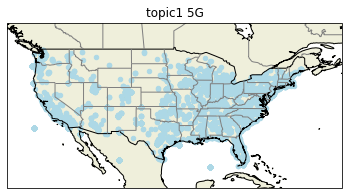

In [36]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()

import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata1.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic1 5G", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

In [ ]:
# USdata1['geo.full_name'].unique()

In [ ]:
#test2=USdata1.loc[USdata1['geo.full_name'] != 'T-Mobile']

In [ ]:
#test2.head(3)

In [ ]:
## error: split 'geo.full_name' 
# test2[['geocity','geostate']] = test2['geo.full_name'].str.split(',',expand=True)

In [37]:
USdata1['count'] = 1
dataByNeighbourhood = USdata1.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<ipython-input-37-bec9ec357018>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata1['count'] = 1


,geo.full_name,count
1611,"los angeles, ca",591
2977,"washington, dc",500
1662,"manhattan, ny",434
331,"brooklyn, ny",335
481,"chicago, il",315
1241,"houston, tx",242
2290,"portland, or",225
1038,"georgia, usa",211
2230,"philadelphia, pa",185
2538,"seattle, wa",165


In [ ]:
#conda install -c conda-forge geoplot

<Figure size 864x720 with 0 Axes>

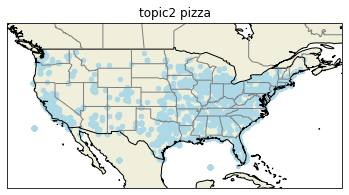

In [38]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()

import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata2.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic2 pizza", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

In [39]:
USdata2['count'] = 1
dataByNeighbourhood = USdata2.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<ipython-input-39-d9a4c651133f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata2['count'] = 1


,geo.full_name,count
1201,"los angeles, ca",241
365,"chicago, il",211
961,"houston, tx",177
1256,"manhattan, ny",176
619,"elizabeth, nj",114
1899,"san francisco, ca",111
705,"florida, usa",103
256,"brooklyn, ny",98
1674,"philadelphia, pa",97
1894,"san antonio, tx",83


<Figure size 864x720 with 0 Axes>

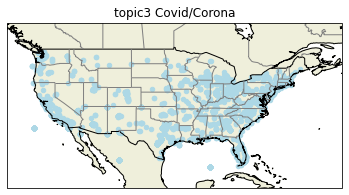

In [40]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()

import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata3.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic3 Covid/Corona", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

In [41]:
USdata3['count'] = 1
dataByNeighbourhood = USdata3.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<ipython-input-41-4d2ffacb9bc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata3['count'] = 1


,geo.full_name,count
690,"los angeles, ca",86
1279,"washington, dc",77
722,"manhattan, ny",70
208,"chicago, il",63
144,"brooklyn, ny",61
541,"houston, tx",55
399,"florida, usa",51
992,"queens, ny",48
959,"philadelphia, pa",46
977,"portland, or",38


<Figure size 864x720 with 0 Axes>

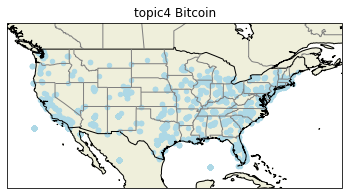

In [42]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()

import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata4.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic4 Bitcoin", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

In [43]:
USdata4['count'] = 1
dataByNeighbourhood = USdata4.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<ipython-input-43-39caf2cd64f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata4['count'] = 1


,geo.full_name,count
555,"los angeles, ca",265
954,"staten island, ny",240
571,"manhattan, ny",140
163,"chicago, il",133
45,"austin, tx",112
430,"houston, tx",103
858,"san diego, ca",101
317,"florida, usa",89
113,"brooklyn, ny",72
355,"georgia, usa",63


<Figure size 864x720 with 0 Axes>

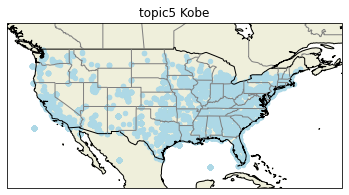

<ipython-input-44-fcc47838bae8>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata5['count'] = 1


,geo.full_name,count
1720,"los angeles, ca",1698
1360,"houston, tx",630
1107,"georgia, usa",467
514,"chicago, il",363
2417,"philadelphia, pa",323
2473,"pomona, ca",318
996,"florida, usa",309
347,"brooklyn, ny",280
3072,"texas, usa",241
110,"atlanta, ga",235


In [44]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()

import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata5.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic5 Kobe", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()
USdata5['count'] = 1
dataByNeighbourhood = USdata5.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

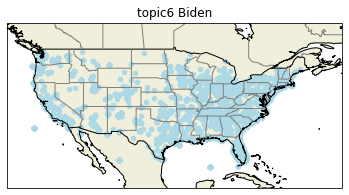

<ipython-input-45-76678835e8f7>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata6['count'] = 1


,geo.full_name,count
2196,"washington, dc",487
1162,"los angeles, ca",272
670,"florida, usa",249
1214,"manhattan, ny",236
762,"georgia, usa",210
475,"dallas, tx",194
715,"franklin park, nj",166
245,"brooklyn, ny",159
1622,"pennsylvania, usa",150
1533,"ohio, usa",132


In [45]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()

import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata6.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic6 Biden", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()
USdata6['count'] = 1
dataByNeighbourhood = USdata6.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

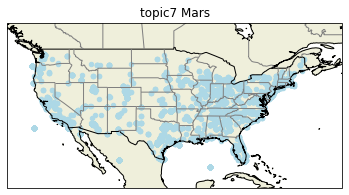

<ipython-input-46-a5f986a469d6>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata7['count'] = 1


,geo.full_name,count
162,"california, usa",570
681,"los angeles, ca",304
1295,"waimalu, hi",259
588,"kentucky, usa",202
702,"manhattan, ny",149
138,"brooklyn, ny",147
204,"chicago, il",143
394,"florida, usa",114
528,"houston, tx",113
55,"austin, tx",109


In [46]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()

import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata7.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic7 Mars", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()
USdata7['count'] = 1
dataByNeighbourhood = USdata7.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

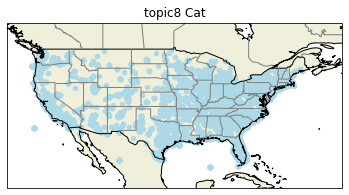

<ipython-input-47-b11ae3cc8090>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata8['count'] = 1


,geo.full_name,count
2254,"los angeles, ca",982
474,"brooklyn, ny",576
683,"chicago, il",563
1804,"houston, tx",512
2338,"manhattan, ny",501
3105,"philadelphia, pa",376
1292,"florida, usa",373
3471,"san diego, ca",351
1463,"georgia, usa",343
188,"austin, tx",305


In [47]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()

import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata8.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic8 Cat", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()
USdata8['count'] = 1
dataByNeighbourhood = USdata8.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

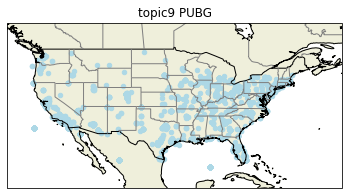

<ipython-input-48-8b69426f68fa>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata9['count'] = 1


,geo.full_name,count
110,"charlotte, nc",174
303,"huntington beach, ca",160
390,"los angeles, ca",85
259,"grandview, mo",66
36,"austin, tx",64
560,"pleasant hill, mo",61
114,"chicago, il",59
28,"arizona, usa",49
401,"malden, ma",45
704,"texas, usa",44


In [48]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()

import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata9.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic9 PUBG", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()
USdata9['count'] = 1
dataByNeighbourhood = USdata9.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

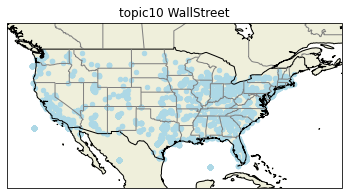

<ipython-input-50-5b8f47004da6>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata10['count'] = 1


,geo.full_name,count
894,"manhattan, ny",658
860,"los angeles, ca",254
162,"brooklyn, ny",212
242,"chicago, il",123
667,"houston, tx",121
1629,"washington, dc",86
490,"florida, usa",85
545,"georgia, usa",84
1226,"philadelphia, pa",77
137,"boston, ma",76


In [50]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()
import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata10.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic10 WallStreet", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()
USdata10['count'] = 1
dataByNeighbourhood = USdata10.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

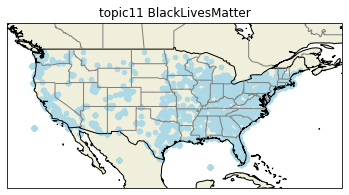

<ipython-input-51-5cdc18ecdc65>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata11['count'] = 1


,geo.full_name,count
1695,"manhattan, ny",1135
1641,"los angeles, ca",1092
3087,"washington, dc",891
491,"chicago, il",621
2609,"seattle, wa",594
327,"brooklyn, ny",554
1851,"minneapolis, mn",468
1289,"houston, tx",464
1065,"georgia, usa",462
116,"atlanta, ga",445


In [51]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()
import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(states_provinces, edgecolor='gray')
USdata11.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic11 BlackLivesMatter", 
        ax=ax)
plt.show()
USdata11['count'] = 1
dataByNeighbourhood = USdata11.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

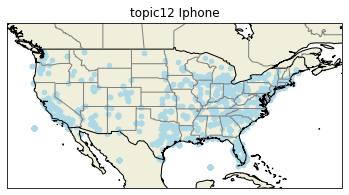

<ipython-input-52-1d343c6941d5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata12['count'] = 1


,geo.full_name,count
572,"los angeles, ca",194
460,"houston, tx",120
592,"manhattan, ny",117
174,"chicago, il",115
111,"brooklyn, ny",93
493,"jonesboro, ga",89
338,"florida, usa",77
381,"georgia, usa",68
42,"atlanta, ga",68
46,"austin, tx",67


In [52]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()
import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(states_provinces, edgecolor='gray')
USdata12.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic12 Iphone", 
        ax=ax)
plt.show()
USdata12['count'] = 1
dataByNeighbourhood = USdata12.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

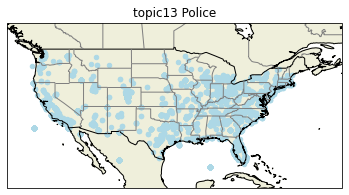

<ipython-input-53-76b3f3fe43d4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata13['count'] = 1


,geo.full_name,count
984,"portland, or",3213
501,"gresham, or",479
1286,"washington, dc",346
694,"los angeles, ca",242
172,"california, usa",157
217,"chicago, il",120
713,"manhattan, ny",108
550,"houston, tx",88
410,"florida, usa",88
466,"georgia, usa",87


In [53]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()
import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(states_provinces, edgecolor='gray')
USdata13.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic13 Police", 
        ax=ax)
plt.show()
USdata13['count'] = 1
dataByNeighbourhood = USdata13.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

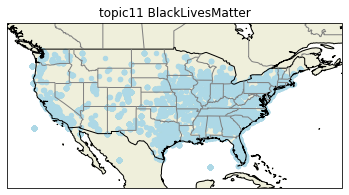

<ipython-input-54-112570366bd2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata14['count'] = 1


,geo.full_name,count
3361,"texas, usa",346
1289,"georgia, usa",242
2423,"north carolina, usa",234
1551,"houston, tx",201
570,"charlotte, nc",173
1965,"los angeles, ca",162
805,"dallas, tx",148
2232,"missouri, usa",139
594,"chicago, il",135
2989,"san antonio, tx",132


In [54]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()
import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(states_provinces, edgecolor='gray')
USdata14.plot(x="lon", y="lat", kind="scatter", c="lightblue", colormap="Blues", 
              title=f"topic11 BlackLivesMatter", ax=ax)
plt.show()
USdata14['count'] = 1
dataByNeighbourhood = USdata14.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

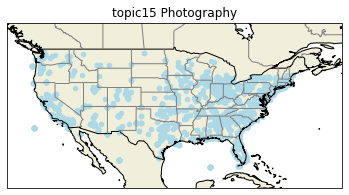

<ipython-input-55-42c21d34e3e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata15['count'] = 1


,geo.full_name,count
660,"los angeles, ca",330
682,"manhattan, ny",247
579,"killeen, tx",160
214,"chicago, il",109
145,"brooklyn, ny",77
1197,"texas, usa",70
838,"north carolina, usa",65
522,"houston, tx",61
57,"atlanta, ga",60
778,"murfreesboro, tn",56


In [55]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()
import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(states_provinces, edgecolor='gray')
USdata15.plot(x="lon", y="lat", kind="scatter", c="lightblue", colormap="Blues", 
              title=f"topic15 Photography", ax=ax)
plt.show()
USdata15['count'] = 1
dataByNeighbourhood = USdata15.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

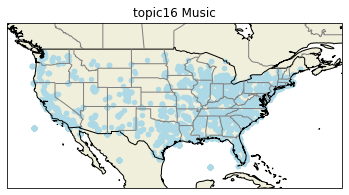

<ipython-input-56-067d834abcc5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata16['count'] = 1


,geo.full_name,count
1115,"los angeles, ca",497
884,"houston, tx",228
1164,"manhattan, ny",223
329,"chicago, il",203
228,"brooklyn, ny",175
63,"atlanta, ga",143
1343,"nashville, tn",136
2024,"texas, usa",128
717,"georgia, usa",125
1579,"philadelphia, pa",119


In [56]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()
import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(states_provinces, edgecolor='gray')
USdata16.plot(x="lon", y="lat", kind="scatter", c="lightblue", colormap="Blues", 
              title=f"topic16 Music", ax=ax)
plt.show()
USdata16['count'] = 1
dataByNeighbourhood = USdata16.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

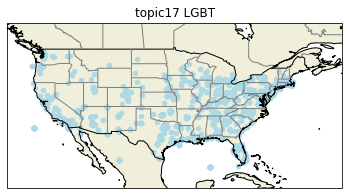

<ipython-input-57-8f1be43e3ba8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata17['count'] = 1


,geo.full_name,count
475,"los angeles, ca",284
500,"manhattan, ny",125
139,"chino valley, az",100
90,"brooklyn, ny",80
137,"chicago, il",72
761,"san francisco, ca",71
370,"houston, tx",69
79,"boston, ma",68
100,"california, usa",67
37,"atlanta, ga",66


In [57]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()
import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(states_provinces, edgecolor='gray')
USdata17.plot(x="lon", y="lat", kind="scatter", c="lightblue", colormap="Blues", 
              title=f"topic17 LGBT", ax=ax)
plt.show()
USdata17['count'] = 1
dataByNeighbourhood = USdata17.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

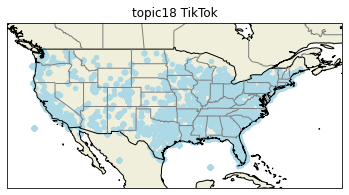

<ipython-input-58-0eff91c86e77>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata18['count'] = 1


,geo.full_name,count
2092,"los angeles, ca",1647
2169,"manhattan, ny",1097
2678,"norwalk, ca",946
440,"brooklyn, ny",725
1670,"houston, tx",706
651,"chicago, il",700
1372,"georgia, usa",613
3280,"san antonio, tx",601
1218,"florida, usa",557
3721,"texas, usa",522


In [58]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()
import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(states_provinces, edgecolor='gray')
USdata18.plot(x="lon", y="lat", kind="scatter", c="lightblue", colormap="Blues", 
              title=f"topic18 TikTok", ax=ax)
plt.show()
USdata18['count'] = 1
dataByNeighbourhood = USdata18.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

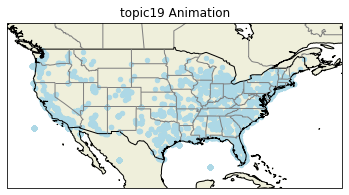

<ipython-input-59-45713dc0d3d0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata19['count'] = 1


,geo.full_name,count
1149,"los angeles, ca",1364
262,"burbank, ca",377
1192,"manhattan, ny",350
245,"brooklyn, ny",234
359,"chicago, il",234
910,"houston, tx",224
670,"florida, usa",210
1791,"san francisco, ca",176
748,"georgia, usa",167
277,"california, usa",149


In [59]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()
import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(states_provinces, edgecolor='gray')
USdata19.plot(x="lon", y="lat", kind="scatter", c="lightblue", colormap="Blues", 
              title=f"topic19 Animation", ax=ax)
plt.show()
USdata19['count'] = 1
dataByNeighbourhood = USdata19.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

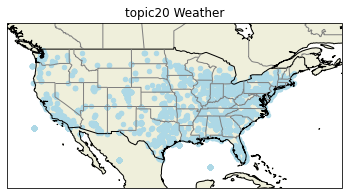

<ipython-input-60-eec3eefc7b36>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata20['count'] = 1


,geo.full_name,count
1016,"louisiana, usa",1307
1049,"manhattan, ny",141
320,"chicago, il",123
53,"apache junction, az",119
1588,"san antonio, tx",115
1015,"los angeles, ca",110
1806,"texas, usa",106
242,"california, usa",91
798,"houston, tx",82
673,"georgia, usa",67


In [60]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()
import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(states_provinces, edgecolor='gray')
USdata20.plot(x="lon", y="lat", kind="scatter", c="lightblue", colormap="Blues", 
              title=f"topic20 Weather", ax=ax)
plt.show()
USdata20['count'] = 1
dataByNeighbourhood = USdata20.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

In [ ]:
###  Create heatmap of user activity ? 

In [ ]:
"""
def graph_heatmap(userId, num_of_tweets, utc_offset):
    index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    cols = ["%.2d:00" %x for x in range(24)]
    df_activity = pd.DataFrame(daily_activity_matrix, index=index, columns=cols)
    axes = sns.heatmap(df_activity, annot=True)
    axes.set_title('Heatmap of @%s Twitter Activity \n Generated %s for last %s tweets' %(userId, datetime.date.today(), num_of_tweets), fontsize=14)
    plt.xlabel("Time (UTC offset in seconds: %s)" %utc_offset)
    plt.yticks(rotation=0)
    plt.savefig("graphs/" + str(userId) + ".png")
"""